In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [12]:
pd.set_option('display.max_columns',None)
df=pd.read_csv(r'E:\Downloads Of csv\marketing_campaign.csv',sep='\t')

In [13]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [15]:
df.shape

(2240, 29)

<img src="https://github.com/KarnikaKapoor/Files/blob/main/Colorful%20Handwritten%20About%20Me%20Blank%20Education%20Presentation.png?raw=true">

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**From The Above We Can See That Income Column Has Some Null Values**
* Dt_Customer indicated the date a customer joined the database is not parsed as DateTime
* As there are categorical columns i.e (dtype:object) Let's encode them Later

**First Of All I'm going to drop all the values for now because there are not much missing values,If there are so many missing values then we can add the missing value with 'Central Tendency(i.e Mean,Meadian,Mode)'**

In [17]:
df=df.dropna()
print('The Total Number Of Datapoints After Removing Null Values',len(df))

The Total Number Of Datapoints After Removing Null Values 2216


In next step I'm going to create a feature out of **Dt_Customer** that indicates the number of days a customer is registered int Firm's Database.However,in order to keep a simple,I'm taking this value relative to most recent customer in the record.

Thus to get values I must Check the newest and Oldest record Dates

In [21]:
df["Dt_Customer"]=pd.to_datetime(df["Dt_Customer"],format='%d-%m-%Y')
dates=[]
for i in df["Dt_Customer"]:
    i=i.date()
    dates.append(i)
print('Newest Customer Enrolment Date in the Records:',max(dates))
print('Oldest Customer Enrolment Date in the Record:',min(dates))

Newest Customer Enrolment Date in the Records: 2014-06-29
Oldest Customer Enrolment Date in the Record: 2012-07-30


Create a feature **("Customer_for")** of the number of days the customers started to shop in the store relative to the last recorded date.

In [22]:
days=[]
d1=max(dates)
for i in dates:
    delta=d1-i
    days.append(delta)
df['Customer_For']=days
df['Customer_For']=pd.to_numeric(df['Customer_For'],errors='coerce')

Now we will be exploring the unique values in the categorical features to get a clear idea of the data.  

In [23]:
print('Total Categories in the feature Marital_Status:\n',df["Marital_Status"].value_counts(),"\n")
print('Total Catogeries in the feature Education:\n',df["Education"].value_counts(),"\n")

Total Categories in the feature Marital_Status:
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total Catogeries in the feature Education:
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64 



In [24]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,57283200000000000
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,9763200000000000
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,26956800000000000
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,12009600000000000
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,13910400000000000


**In the next bit, I will be performing the following steps to engineer some new features:**

* Extract the **"Age"** of a customer by the **"Year_Birth"** indicating the birth year of the respective person.
* Create another feature **"Spent"** indicating the total amount spent by the customer in various categories over the span of two years.
* Create another feature **"Living_With"** out of **"Marital_Status"** to extract the living situation of couples.
* Create a feature **"Children"** to indicate total children in a household that is, kids and teenagers.
* To get further clarity of household, Creating feature indicating **"Family_Size"**
* Create a feature **"Is_Parent"** to indicate parenthood status
* Lastly, I will create three categories in the **"Education"** by simplifying its value counts.
* Dropping some of the redundant features

In [28]:
df['Age']=2021-df['Year_Birth']
df['Amount_Spent']=df['Fish']+df['Fruits']+df['Gold']+df['Meat']+df['Sweet']
df['Living_With']=df['Marital_Status'].replace({'Married':'Partner','Together':'Partner','Single':'Alone','Divorced':'Alone','Widow':'Alone','Alone':'Alone','Absurd':'Alone','YOLO':'Alone'})
df['Children']=df['Kidhome']+df['Teenhome']
df['Family_Size']=df['Living_With'].replace({'Alone':1,'Partner':2})
df['IS_Parent']=np.where(df.Children>0,1,0)
df['Education']=df['Education'].replace({'Graduation':'Graduated','PhD':'PostGraduate','Master':'PostGraduate','Basic':'UnderGraduate','2n Cycle':'UnderGraduate'})
df=df.rename(columns={'MntWines':'Wines','MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweet','MntGoldProds':'Gold'})
df=df.drop(['Marital_Status','Dt_Customer','Z_CostContact','Z_Revenue','Year_Birth','ID'],axis=1)

In [29]:
df.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Amount_Spent,Living_With,Children,Family_Size,IS_Parent
0,Graduated,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57283200000000000,64,982,Alone,0,1,0
1,Graduated,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,9763200000000000,67,16,Alone,2,1,1
2,Graduated,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,26956800000000000,56,350,Partner,0,2,0
3,Graduated,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,12009600000000000,37,42,Partner,1,2,1
4,PostGraduate,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,13910400000000000,40,249,Partner,1,2,1


In [30]:
df.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Amount_Spent,Children,Family_Size,IS_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,3.054423e+16,52.179603,301.983755,0.947202,1.645307,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,1.749036e+16,11.985554,337.632733,0.749062,0.478528,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,25.000000,1.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.555200e+16,44.000000,42.000000,0.000000,1.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.071520e+16,51.000000,143.500000,1.000000,2.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.570560e+16,62.000000,486.250000,1.000000,2.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.039360e+16,128.000000,1729.000000,3.000000,2.000000,1.000000


The above stats show some discrepancies in mean Income and Age and max Income and age.

Do note that  max-age is 128 years, As I calculated the age that would be today (i.e. 2021) and the data is old.

I must take a look at the broader view of the data. 
I will plot some of the selected features.

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 640x480 with 0 Axes>

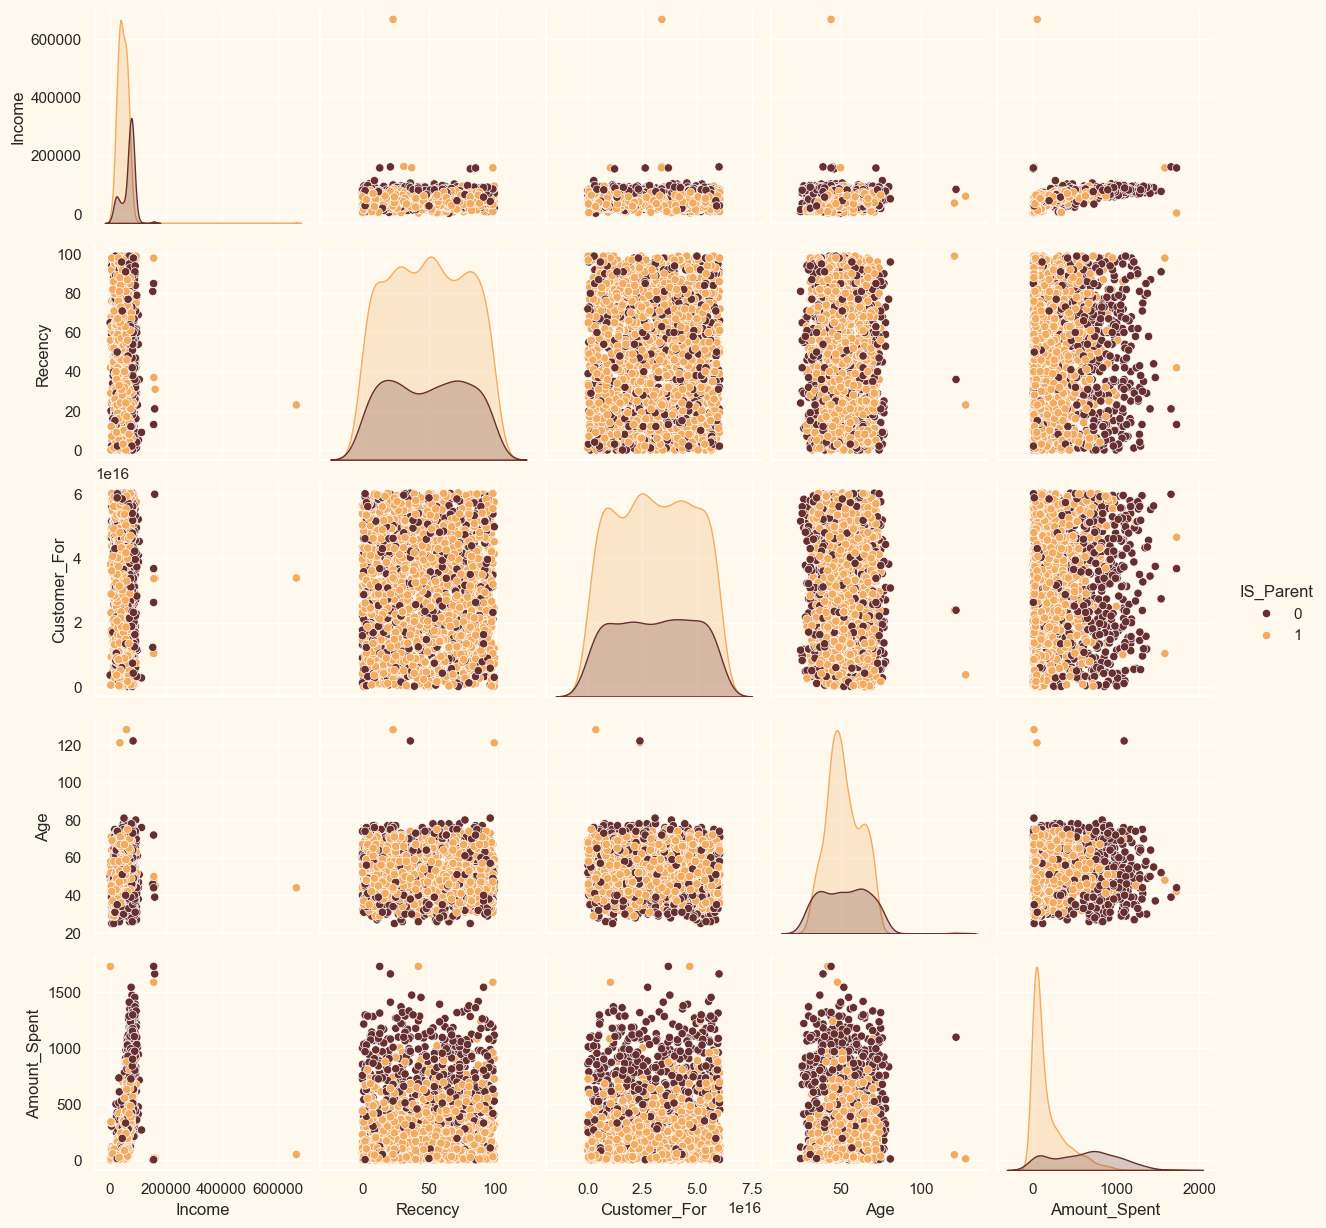

In [32]:
from matplotlib import colors
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Amount_Spent", "IS_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(df[To_Plot], hue= "IS_Parent",palette= (["#682F2F","#F3AB60"]))
plt.show()

Clearly, there are a few outliers in the Income and Age features. 
I will be deleting the outliers in the data. 

In [33]:
df=df[(df['Age']<90)]
df=df[(df['Income']<600000)]
print('DataPoints After Removing Outliers',len(df))

DataPoints After Removing Outliers 2212


The data is quite clean and the new features have been included. I will proceed to the next step. That is, preprocessing the data. 

<a id="4"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">DATA PREPROCESSING</p>

In this section, I will be preprocessing the data to perform clustering operations.

**The following steps are applied to preprocess the data:**

* Label encoding the categorical features
* Scaling the features using the standard scaler 
* Creating a subset dataframe for dimensionality reduction

In [35]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [36]:
from  sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(le.fit_transform)
print('All Features Are now numerical')

All Features Are now numerical


In [37]:
ds=df.copy()
cols_del=['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds=ds.drop(cols_del,axis=1)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(ds)
scaler_ds=pd.DataFrame(scaler.transform(ds),columns=ds.columns)
print('All Features Are now Scaled')

All Features Are now Scaled


In [39]:
print("Dataframe to be used for further modelling:")
scaler_ds.head()

Dataframe to be used for further modelling:


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Amount_Spent,Living_With,Children,Family_Size,IS_Parent
0,0.0,0.351086,0.0,0.0,0.585859,0.425318,0.442211,0.316522,0.664093,0.335878,0.274143,0.200000,0.296296,0.357143,0.307692,0.35,0.948498,0.696429,0.567708,0.0,0.000000,0.0,0.0
1,0.0,0.277680,0.5,0.5,0.383838,0.007368,0.005025,0.003478,0.007722,0.003817,0.018692,0.133333,0.037037,0.035714,0.153846,0.25,0.161660,0.750000,0.008681,0.0,0.666667,0.0,1.0
2,0.0,0.434956,0.0,0.0,0.262626,0.285332,0.246231,0.073623,0.428571,0.080153,0.130841,0.066667,0.296296,0.071429,0.769231,0.20,0.446352,0.553571,0.201968,1.0,0.000000,1.0,0.0
3,0.0,0.155079,0.5,0.0,0.262626,0.007368,0.020101,0.011594,0.038610,0.011450,0.015576,0.133333,0.074074,0.000000,0.307692,0.30,0.198856,0.214286,0.023727,1.0,0.333333,1.0,1.0
4,0.5,0.352051,0.5,0.0,0.949495,0.115874,0.216080,0.068406,0.177606,0.103053,0.046729,0.333333,0.185185,0.107143,0.461538,0.25,0.230329,0.267857,0.143519,1.0,0.333333,1.0,1.0


<a id="5"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">DIMENSIONALITY REDUCTION</p>
In this problem, there are many factors on the basis of which the final classification will be done. These factors are basically attributes or features. The higher the number of features, the harder it is to work with it. Many of these features are correlated, and hence redundant. This is why I will be performing dimensionality reduction on the selected features before putting them through a classifier.  
*Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.* 

**Principal component analysis (PCA)** is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

**Steps in this section:**
* Dimensionality reduction with PCA
* Plotting the reduced dataframe

**Dimensionality reduction with PCA**

For this project, I will be reducing the dimensions to 3.

In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(scaler_ds)
PCA_ds = pd.DataFrame(pca.transform(scaler_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,-1.830965e-16,0.682028,-1.309658,-0.719867,0.289930,0.603828,0.793930
col2,2212.0,3.533440e-17,0.631511,-1.594405,-0.521557,0.183299,0.465794,1.240908
col3,2212.0,5.139550e-17,0.389975,-1.088832,-0.280074,-0.018178,0.268769,1.135547


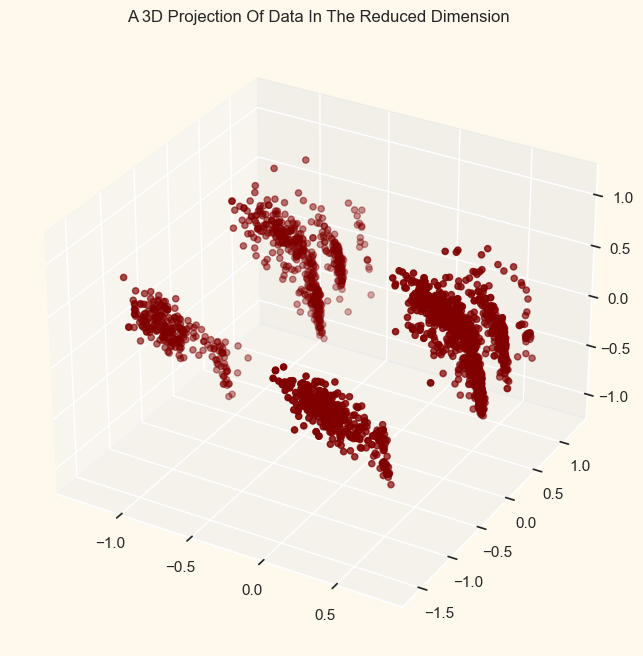

In [41]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

<a id="6"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">CLUSTERING</p>

Now that I have reduced the attributes to three dimensions, I will be performing clustering via Agglomerative clustering. Agglomerative clustering is a hierarchical clustering method.  It involves merging examples until the desired number of clusters is achieved.

**Steps involved in the Clustering**
* Elbow Method to determine the number of clusters to be formed
* Clustering via Agglomerative Clustering
* Examining the clusters formed via scatter plot

In [53]:
from sklearn.cluster import AgglomerativeClustering
AC = AgglomerativeClustering(n_clusters=4)
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
df["Clusters"]= yhat_AC

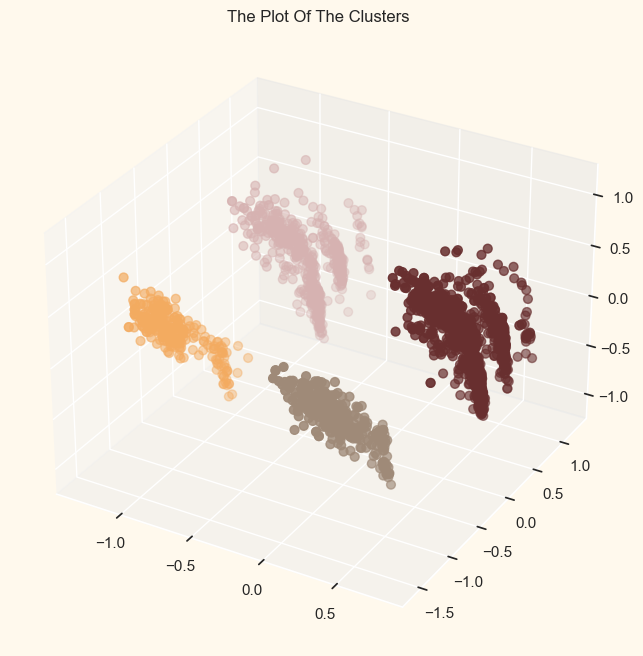

In [54]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

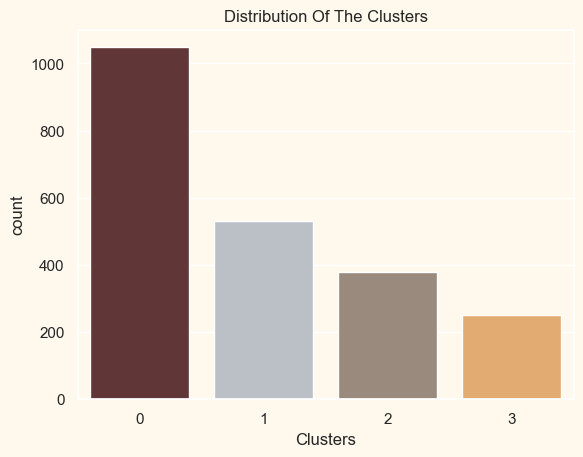

In [56]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

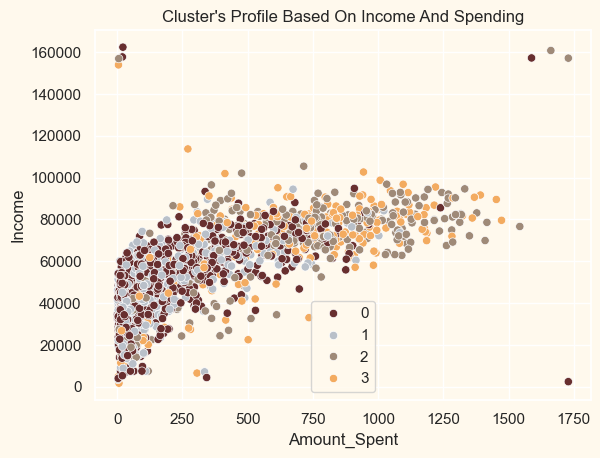

In [59]:
pl = sns.scatterplot(data = df,x=df["Amount_Spent"], y=df["Income"],hue=df["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

In [61]:
ds.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Amount_Spent,Living_With,Children,Family_Size,IS_Parent
0,0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,57283200000000000,64,982,0,0,1,0
1,0,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,9763200000000000,67,16,0,2,1,1
2,0,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,26956800000000000,56,350,1,0,2,0
3,0,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,12009600000000000,37,42,1,1,2,1
4,1,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,13910400000000000,40,249,1,1,2,1


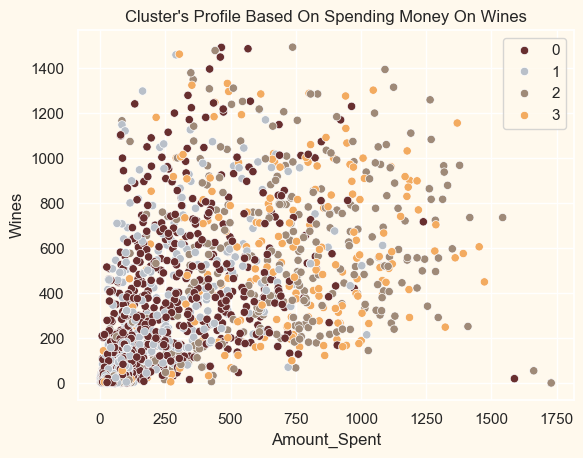

In [62]:
pl = sns.scatterplot(data = df,x=df["Amount_Spent"], y=df["Wines"],hue=df["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Spending Money On Wines")
plt.legend()
plt.show()